In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp keypoint.vis

# Visualization

> API details.

In [ ]:
#| export
from fastcore.all import *
import PIL
import numpy as np
import polvo as pv
# from typing import Tuple
# from PIL import Image, ImageFont
from PIL.ImageDraw import ImageDraw
# from polvo.bbox import BBox, OBBox, BBoxLabeled, OBBoxLabeled
from polvo.keypoint import Keypoints

/home/michael/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|export
def overlay(image:PIL.Image, keypoints:Keypoints, color:Tuple[int,int,int]=None, dot_radius=None):
    """Draws a box on an image with a given color.
    # Arguments
        image     : The image to draw on.
        box       : A list of 4 elements (x1, y1, x2, y2).
        color     : The color of the box.
    """
    draw = PIL.ImageDraw.Draw(image)
    color = color or (255, 50, 50)
    
    r = dot_radius or int(min(image.size)/100)
    for i, (x,y) in enumerate(keypoints.xy_points):
        coords = x-r,y-r,x+r,y+r
        draw.ellipse(coords, fill=color)
        
    return image

<AxesSubplot:>

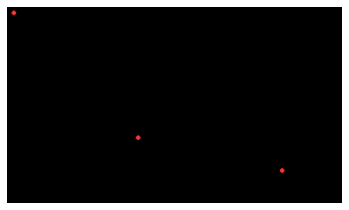

In [ ]:
image = PIL.Image.fromarray(np.zeros((300, 512, 3), dtype=np.uint8))
image = overlay(image, Keypoints.from_flat([10, 10, 200, 200, 420, 250]))
pv.show_image(image)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()